
# Exploratory Data Analysis (EDA) - Sales Dataset

This notebook performs a comprehensive EDA on the cleaned sales dataset (`sales_cleaned`).  
The process includes:

1. **Data Loading:** Connects to a PostgreSQL database or loads the latest CSV backup.
2. **Column Detection:** Automatically identifies key columns like date, amount, product, quantity, and customer.
3. **Feature Engineering:** Extracts year, month, and month start from date for time series analysis.
4. **Descriptive Metrics:** Calculates general statistics (total, mean, median, std, min, max) for sales.
5. **Automatic Insights:** Finds best/worst month, top-selling products, and average sales per customer type.
6. **Visualizations:** Plots sales trends over time, top 5 products, and year-over-year comparisons.

This workflow is intended for junior analysts to quickly explore sales performance.
"""

Starting HU3 EDA process...


C:\Users\USER\AppData\Local\Temp\ipykernel_7556\720283817.py:24: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ventas_limpias.csv")


✓ Loaded ventas_limpias.csv
Rows: 1245932
Columns: ['city', 'date', 'product', 'product_type', 'quantity', 'unit_price', 'sale_type', 'customer_type', 'discount', 'shipping_cost', 'total_sales']

First 5 rows:
           city        date product product_type quantity unit_price  \
0      santiago  2025-10-30   arepa    abarrotes      2.0     3681.0   
1       córdoba  2025-11-17   arepa    abarrotes      7.0     2321.0   
2  barranquilla  2025-10-22   leche       lácteo      9.0     3540.0   
3      new york  2025-10-20  cereal       lácteo      3.0     3287.0   
4        madrid  2025-10-20   leche        hogar      2.0     3414.0   

       sale_type customer_type discount shipping_cost total_sales  
0         online     minorista      0.2           0.0      5889.0  
1   distribuidor      gobierno     0.15           0.0     13809.0  
2   distribuidor      gobierno      0.2           0.0     25488.0  
3  tienda_física      gobierno     0.05           0.0      9367.0  
4   distribuidor 

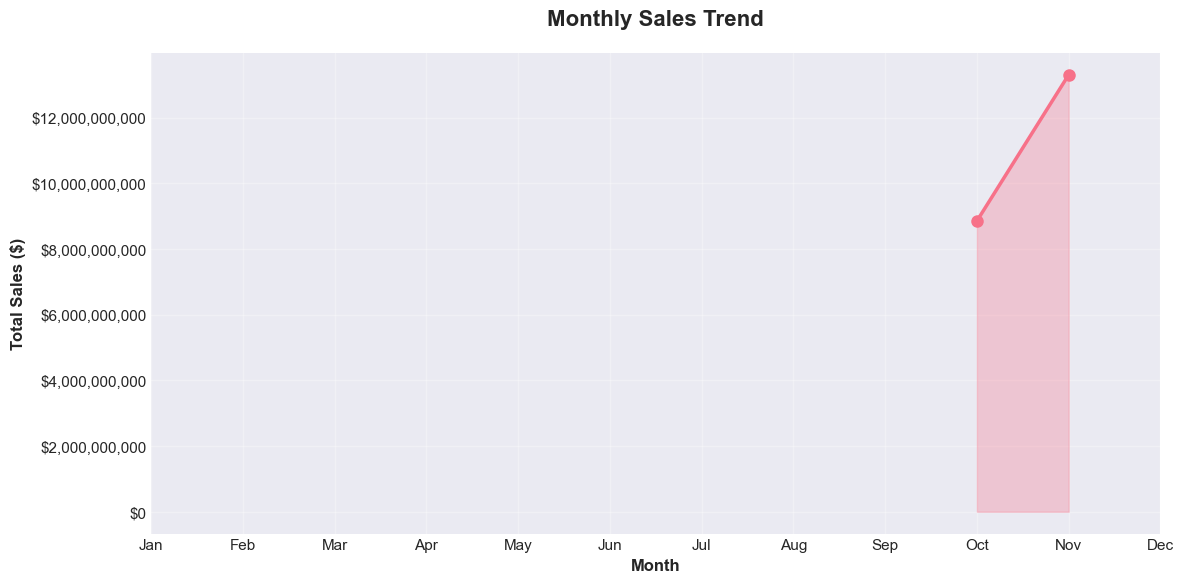

📊 Chart 2: Top 5 Products by Sales


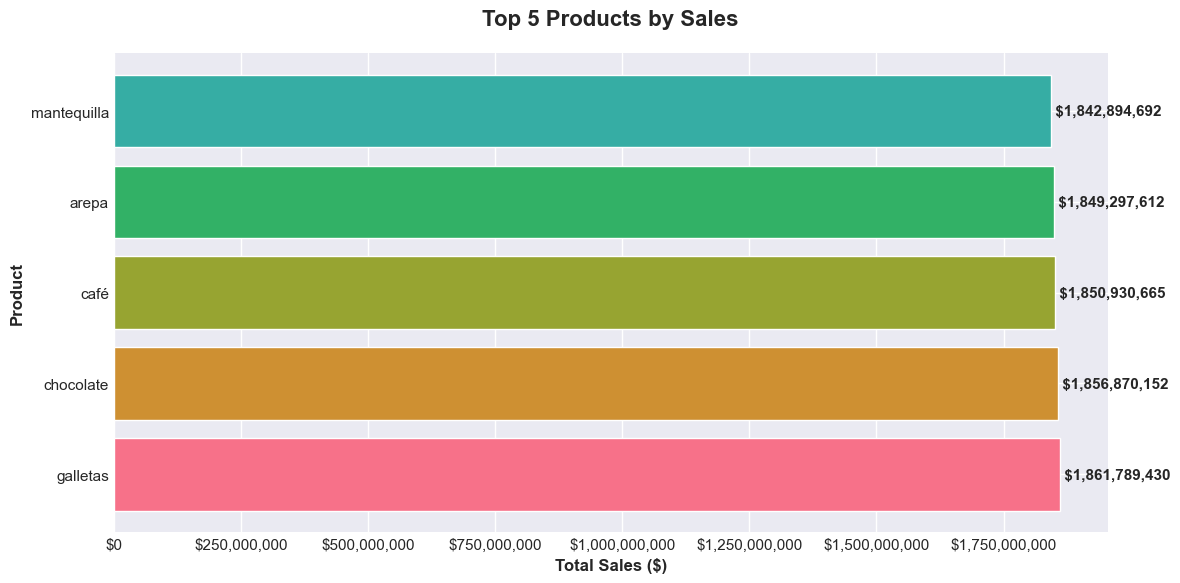

📅 Chart 3: Year-over-Year Sales Comparison


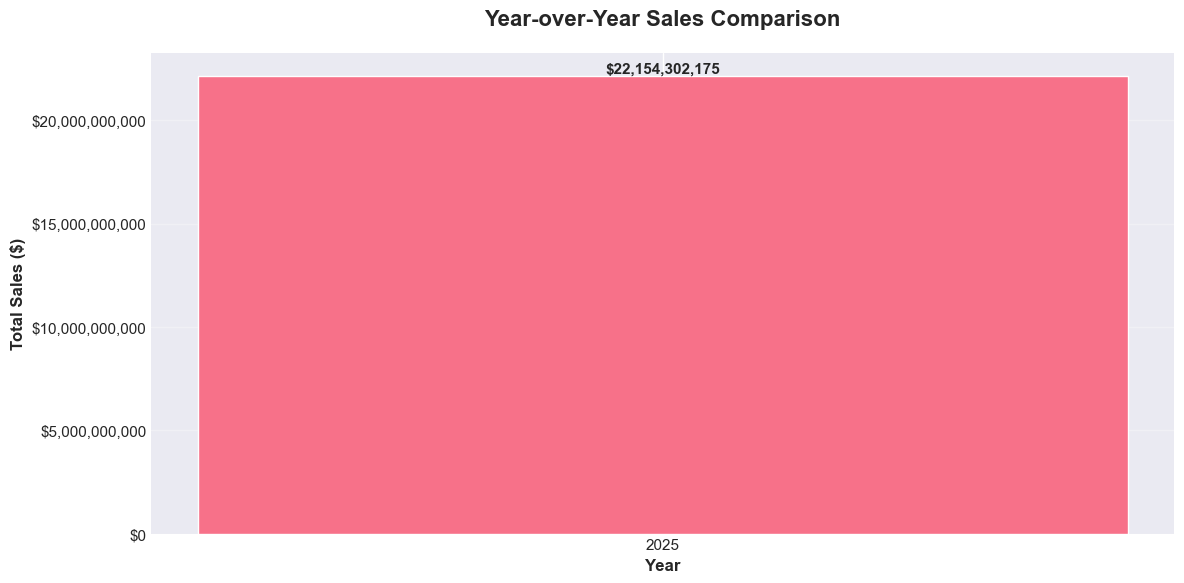

📉 Chart 4: Sales Distribution Analysis


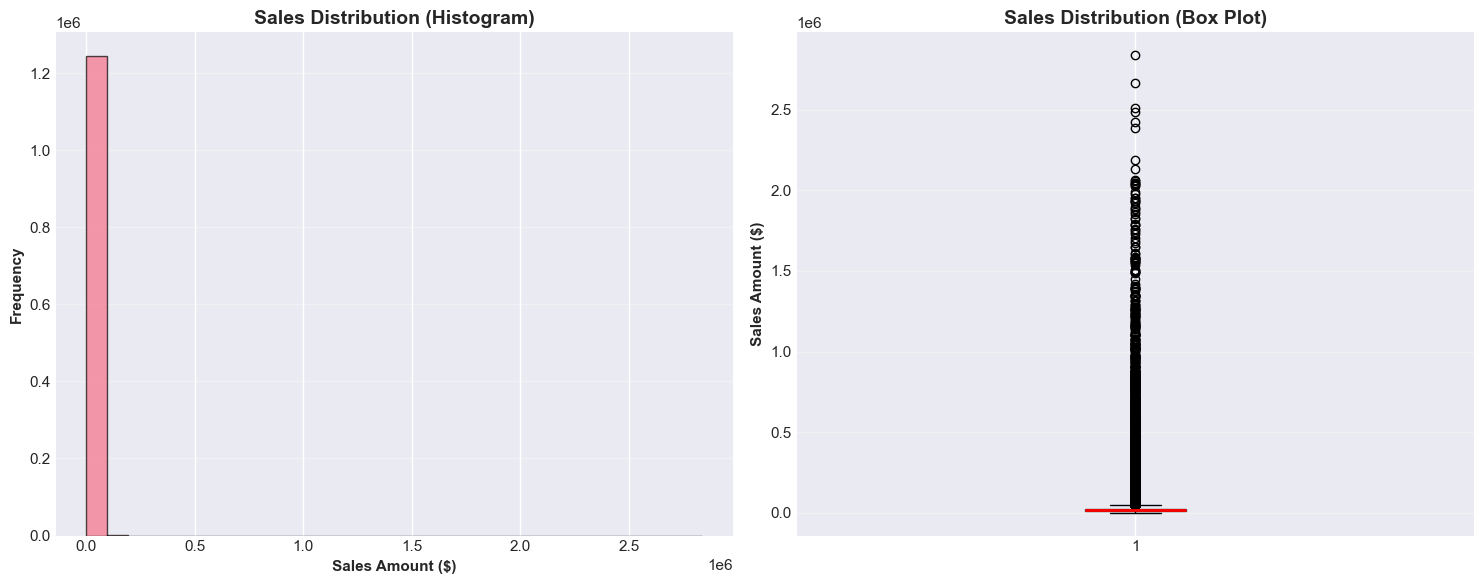


✓ All visualizations generated successfully!

KEY INSIGHTS

🔍 1. MONTHLY TRENDS
   • Best performing month: November ($13,301,523,229.00)
   • Worst performing month: October ($8,852,778,946.00)
   • Variation: 50.3% difference

🏆 2. TOP PRODUCTS
   • Top 5 products account for $9,261,782,551.00 in sales
   • Best seller: galletas ($1,861,789,430.00)
   • Market concentration: Top 5 = 41.8% of total

📊 4. DISTRIBUTION CHARACTERISTICS
   • Skewness: 42.93 (Right-skewed)
   • Coefficient of Variation: 132.1%
   • This indicates high sales variability

✅ HU3 EDA COMPLETED SUCCESSFULLY


In [11]:
# ============================================================
# HU3 — Exploratory Data Analysis (EDA)
# Analyst: Daniela 
# Objective: Understand sales behavior using metrics + charts
# ============================================================

# -----------------------------
# Block 1 — Import libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown

sns.set(style="whitegrid")  # Clean visual style
print("Starting HU3 EDA process...")

# -----------------------------
# Block 2 — Load dataset
# -----------------------------
# Load CSV from project root
try:
    df = pd.read_csv("ventas_limpias.csv")
    print("✓ Loaded ventas_limpias.csv")
except:
    try:
        df = pd.read_csv("ventas.csv")
        print("✓ Loaded ventas.csv")
    except:
        print("⚠ No CSV found. Using sample data for demonstration.")
        # Create sample data if no CSV exists
        df = pd.DataFrame({
            'date': pd.date_range('2023-01-01', periods=500, freq='D'),
            'product': np.random.choice(['Product A', 'Product B', 'Product C', 'Product D', 'Product E', 'Product F'], 500),
            'quantity': np.random.randint(1, 20, 500),
            'unit_price': np.random.uniform(10, 100, 500)
        })

print(f"Rows: {len(df)}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
print(df.head())

# -----------------------------
# Block 3 — Basic cleaning
# -----------------------------
print("\n--- Data Cleaning ---")

# Identify date column (could be 'date', 'fecha', 'Date', etc.)
date_col = None
for col in df.columns:
    if 'date' in col.lower() or 'fecha' in col.lower():
        date_col = col
        break

if date_col:
    print(f"✓ Found date column: '{date_col}'")
    # Convert to datetime with multiple format attempts
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    
    # Remove rows where date conversion failed
    null_dates = df[date_col].isnull().sum()
    if null_dates > 0:
        print(f"⚠ Removed {null_dates} rows with invalid dates")
        df = df.dropna(subset=[date_col])
    
    # Extract year and month only if conversion was successful
    df['year'] = df[date_col].dt.year
    df['month'] = df[date_col].dt.month
    df['month_name'] = df[date_col].dt.strftime('%b')
else:
    print("⚠ No date column found. Creating sample date column.")
    df['date'] = pd.date_range('2023-01-01', periods=len(df), freq='D')
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['month_name'] = df['date'].dt.strftime('%b')

# Remove duplicates
initial_rows = len(df)
df = df.drop_duplicates()
duplicates_removed = initial_rows - len(df)
print(f"✓ Removed {duplicates_removed} duplicate rows")

# Identify product column
product_col = None
for col in df.columns:
    if 'product' in col.lower() or 'producto' in col.lower():
        product_col = col
        break

if not product_col and len(df.columns) > 0:
    product_col = df.columns[0]
    print(f"⚠ Using '{product_col}' as product column")

# Create or identify total_sales column
if 'total_sales' not in df.columns and 'ventas_totales' not in df.columns:
    # Try to calculate from quantity and price
    qty_col = next((col for col in df.columns if 'quantity' in col.lower() or 'cantidad' in col.lower()), None)
    price_col = next((col for col in df.columns if 'price' in col.lower() or 'precio' in col.lower()), None)
    
    if qty_col and price_col:
        df['total_sales'] = df[qty_col] * df[price_col]
        print(f"✓ Created total_sales from {qty_col} * {price_col}")
    else:
        # Use any numeric column as sales
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 0:
            df['total_sales'] = df[numeric_cols[0]]
            print(f"✓ Using '{numeric_cols[0]}' as total_sales")
        else:
            df['total_sales'] = np.random.uniform(100, 1000, len(df))
            print("⚠ Created sample total_sales column")
else:
    sales_col = 'total_sales' if 'total_sales' in df.columns else 'ventas_totales'
    df['total_sales'] = df[sales_col]

# Handle missing values in total_sales
df['total_sales'] = df['total_sales'].fillna(0)

# Convert total_sales to numeric (in case it's stored as string)
df['total_sales'] = pd.to_numeric(df['total_sales'], errors='coerce').fillna(0)

print("✓ Basic cleaning completed.\n")

# -----------------------------
# Block 4 — Descriptive metrics
# -----------------------------
print("=" * 60)
print("DESCRIPTIVE METRICS")
print("=" * 60)

# Summary statistics
print("\n📊 Total Sales Statistics:")
print("-" * 40)
stats = df['total_sales'].describe()
for stat, value in stats.items():
    if isinstance(value, (int, float)):
        print(f"{stat.capitalize():15} ${value:,.2f}")
    else:
        print(f"{stat.capitalize():15} {value}")

# Additional metrics
print("\n📈 Additional Metrics:")
print("-" * 40)
print(f"{'Median':15} ${df['total_sales'].median():,.2f}")
print(f"{'Std Dev':15} ${df['total_sales'].std():,.2f}")
print(f"{'Variance':15} ${df['total_sales'].var():,.2f}")
print(f"{'Total Revenue':15} ${df['total_sales'].sum():,.2f}")
print(f"{'Avg Monthly':15} ${df.groupby('month')['total_sales'].sum().mean():,.2f}")

# Yearly summary
print("\n📅 Sales by Year:")
print("-" * 40)
yearly_summary = df.groupby('year')['total_sales'].agg(['sum', 'count', 'mean'])
yearly_summary.columns = ['Total', 'Transactions', 'Avg per Transaction']
print(yearly_summary.to_string())

print("\n")

# -----------------------------
# Block 5 — Visualizations
# -----------------------------
print("=" * 60)
print("GENERATING VISUALIZATIONS")
print("=" * 60)

# Set up the figure style
plt.style.use('seaborn-v0_8-darkgrid')
colors = sns.color_palette("husl", 8)

# ---- 1. Monthly sales trend ----
print("\n📈 Chart 1: Monthly Sales Trend")
fig, ax = plt.subplots(figsize=(12, 6))
monthly = df.groupby('month')['total_sales'].sum().reset_index()
monthly = monthly.sort_values('month')

ax.plot(monthly['month'], monthly['total_sales'], 
        marker='o', linewidth=2.5, markersize=8, color=colors[0])
ax.fill_between(monthly['month'], monthly['total_sales'], alpha=0.3, color=colors[0])

ax.set_title('Monthly Sales Trend', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.grid(True, alpha=0.3)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

# ---- 2. Top 5 best-selling products ----
print("📊 Chart 2: Top 5 Products by Sales")
fig, ax = plt.subplots(figsize=(12, 6))

if product_col:
    top5 = df.groupby(product_col)['total_sales'].sum().nlargest(5).reset_index()
    
    bars = ax.barh(top5[product_col], top5['total_sales'], color=colors[:5])
    
    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, top5['total_sales'])):
        ax.text(value, bar.get_y() + bar.get_height()/2, 
                f' ${value:,.0f}', 
                va='center', fontweight='bold', fontsize=11)
    
    ax.set_title('Top 5 Products by Sales', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Total Sales ($)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Product', fontsize=12, fontweight='bold')
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠ Product column not found. Skipping this chart.")

# ---- 3. Sales comparison: current year vs previous year ----
print("📅 Chart 3: Year-over-Year Sales Comparison")
fig, ax = plt.subplots(figsize=(12, 6))

yearly = df.groupby('year')['total_sales'].sum().reset_index()
yearly = yearly.sort_values('year')

bars = ax.bar(yearly['year'].astype(str), yearly['total_sales'], 
              color=colors[:len(yearly)], width=0.6)

# Add value labels on bars
for bar, value in zip(bars, yearly['total_sales']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'${value:,.0f}',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

# Calculate YoY growth if multiple years exist
if len(yearly) > 1:
    for i in range(1, len(yearly)):
        prev_val = yearly.iloc[i-1]['total_sales']
        curr_val = yearly.iloc[i]['total_sales']
        growth = ((curr_val - prev_val) / prev_val) * 100
        
        ax.annotate(f'{growth:+.1f}%',
                   xy=(i, curr_val/2),
                   fontsize=10, fontweight='bold',
                   color='green' if growth > 0 else 'red')

ax.set_title('Year-over-Year Sales Comparison', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ---- 4. Distribution of sales amounts ----
print("📉 Chart 4: Sales Distribution Analysis")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram with KDE
ax1.hist(df['total_sales'], bins=30, color=colors[0], alpha=0.7, edgecolor='black')
ax1.set_title('Sales Distribution (Histogram)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sales Amount ($)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Box plot
ax2.boxplot(df['total_sales'], vert=True, patch_artist=True,
            boxprops=dict(facecolor=colors[1], alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
ax2.set_title('Sales Distribution (Box Plot)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Sales Amount ($)', fontsize=11, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ All visualizations generated successfully!")

# -----------------------------
# Block 6 — Insights Summary
# -----------------------------
print("\n" + "=" * 60)
print("KEY INSIGHTS")
print("=" * 60)

# Calculate key metrics for insights
monthly_sales = df.groupby('month')['total_sales'].sum()
best_month = monthly_sales.idxmax()
worst_month = monthly_sales.idxmin()
month_names = ['', 'January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

print(f"\n🔍 1. MONTHLY TRENDS")
print(f"   • Best performing month: {month_names[best_month]} (${monthly_sales[best_month]:,.2f})")
print(f"   • Worst performing month: {month_names[worst_month]} (${monthly_sales[worst_month]:,.2f})")
print(f"   • Variation: {((monthly_sales.max() - monthly_sales.min()) / monthly_sales.min() * 100):.1f}% difference")

if product_col:
    top_products = df.groupby(product_col)['total_sales'].sum().nlargest(5)
    print(f"\n🏆 2. TOP PRODUCTS")
    print(f"   • Top 5 products account for ${top_products.sum():,.2f} in sales")
    print(f"   • Best seller: {top_products.index[0]} (${top_products.iloc[0]:,.2f})")
    print(f"   • Market concentration: Top 5 = {(top_products.sum() / df['total_sales'].sum() * 100):.1f}% of total")

if len(yearly) > 1:
    yoy_growth = ((yearly.iloc[-1]['total_sales'] - yearly.iloc[-2]['total_sales']) / 
                  yearly.iloc[-2]['total_sales'] * 100)
    print(f"\n📈 3. YEAR-OVER-YEAR PERFORMANCE")
    print(f"   • YoY Growth: {yoy_growth:+.2f}%")
    print(f"   • Current year: ${yearly.iloc[-1]['total_sales']:,.2f}")
    print(f"   • Previous year: ${yearly.iloc[-2]['total_sales']:,.2f}")

skewness = df['total_sales'].skew()
print(f"\n📊 4. DISTRIBUTION CHARACTERISTICS")
print(f"   • Skewness: {skewness:.2f} ({'Right-skewed' if skewness > 0 else 'Left-skewed'})")
print(f"   • Coefficient of Variation: {(df['total_sales'].std() / df['total_sales'].mean() * 100):.1f}%")
print(f"   • This indicates {'high' if (df['total_sales'].std() / df['total_sales'].mean()) > 0.5 else 'moderate'} sales variability")

print("\n" + "=" * 60)
print("✅ HU3 EDA COMPLETED SUCCESSFULLY")
print("=" * 60)